In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import plotly.express as px
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN

Using TensorFlow backend.
C:\Users\yuka\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\yuka\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\yuka\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\yuka\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529

In [2]:
df = pd.read_csv("data/Training_set_values.csv")
label = pd.read_csv("data/training_set_labels.csv")

In [3]:
df = pd.merge(df,label, on = "id")
df

id  amount_tsh date_recorded           funder  gps_height  \
0      69572      6000.0    2011-03-14            Roman        1390   
1       8776         0.0    2013-03-06          Grumeti        1399   
2      34310        25.0    2013-02-25     Lottery Club         686   
3      67743         0.0    2013-01-28           Unicef         263   
4      19728         0.0    2011-07-13      Action In A           0   
...      ...         ...           ...              ...         ...   
59395  60739        10.0    2013-05-03  Germany Republi        1210   
59396  27263      4700.0    2011-05-07      Cefa-njombe        1212   
59397  37057         0.0    2011-04-11              NaN           0   
59398  31282         0.0    2011-03-08            Malec           0   
59399  26348         0.0    2011-03-23       World Bank         191   

          installer  longitude   latitude              wpt_name  num_private  \
0             Roman  34.938093  -9.856322                  none            0   
1           GRUMETI  34.698766  -2.147466              Zahanati            0   
2      World vision  37.460664  -3.821329           Kwa Mahundi            0   
3            UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
4           Artisan  31.130847  -1.825359               Shuleni            0   
...             ...        ...        ...                   ...          ...   
59395           CES  37.169807  -3.253847   Area Three Namba 27            0   
59396          Cefa  35.249991  -9.070629     Kwa Yahona Kuvala            0   
59397           NaN  34.017087  -8.750434               Mashine            0   
59398          Musa  35.861315  -6.378573                Mshoro            0   
59399         World  38.104048  -6.747464       Kwa Mzee Lugawa            0   

       ... water_quality quality_group      quantity  quantity_group  \
0      ...          soft          good        enough          enough   
1      ...          soft          good  insufficient    insufficient   
2      ...          soft          good        enough          enough   
3      ...          soft          good           dry             dry   
4      ...          soft          good      seasonal        seasonal   
...    ...           ...           ...           ...             ...   
59395  ...          soft          good        enough          enough   
59396  ...          soft          good        enough          enough   
59397  ...      fluoride      fluoride        enough          enough   
59398  ...          soft          good  insufficient    insufficient   
59399  ...         salty         salty        enough          enough   

                     source           source_type source_class  \
0                    spring                spring  groundwater   
1      rainwater harvesting  rainwater harvesting      surface   
2                       dam                   dam      surface   
3               machine dbh              borehole  groundwater   
4      rainwater harvesting  rainwater harvesting      surface   
...                     ...                   ...          ...   
59395                spring                spring  groundwater   
59396                 river            river/lake      surface   
59397           machine dbh              borehole  groundwater   
59398          shallow well          shallow well  groundwater   
59399          shallow well          shallow well  groundwater   

                   waterpoint_type waterpoint_type_group    status_group  
0               communal standpipe    communal standpipe      functional  
1               communal standpipe    communal standpipe      functional  
2      communal standpipe multiple    communal standpipe      functional  
3      communal standpipe multiple    communal standpipe  non functional  
4               communal standpipe    communal standpipe      functional  
...                            ...                   ...             ...  
59395        

In [4]:
df.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [5]:
df.status_group.value_counts()/len(df.status_group)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [6]:
dfpx = [["functional",54.3,32259],["non functional",38.4,22824],["functional needs repair",7.2,4317]]


In [7]:
dfpx_chart = pd.DataFrame(dfpx,columns=["Labels","Percentage","The number of observations"])
dfpx_chart

Labels  Percentage  The number of observations
0               functional        54.3                       32259
1           non functional        38.4                       22824
2  functional needs repair         7.2                        4317

In [8]:
fig = px.bar(dfpx_chart, y='The number of observations',x='Labels',text='Percentage',color="Labels")
fig.show()

# Data balance

In [10]:
ax =sns.countplot(x = "status_group",data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

# Payment status

* non functional have more "NeverPay"

In [12]:
def pay_cl(df):
    if df["payment"]=="never pay":
        return "NeverPay"
    elif df["payment"]=="unknown":
        return "Unknown"
    else:
        return "Pay"
df["pay_category"] = df.apply(lambda df:pay_cl(df),axis =1)

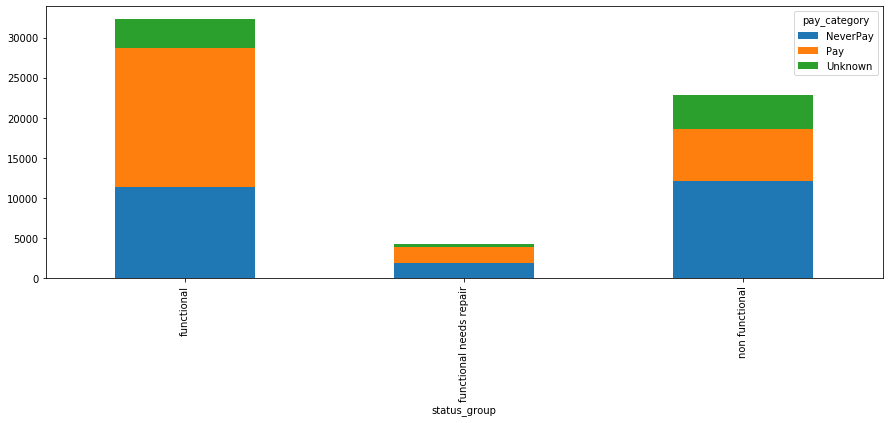

In [13]:
pd.crosstab(df.status_group, df.pay_category).plot.bar(stacked=True, figsize=(15,5));

# Top 10  Funders and installers

In [14]:
# keep top 10 of funder and installer

def installer_cl(df):
    if df['installer']=="DWE":
        return 'dwe'
    elif df['installer']=="Government":
        return 'gov'
    elif df['installer']=="RWE":
        return "rwe"
    elif df['installer']=="Commu":
        return"commu"
    elif df['installer']=="DANIDA":
        return"danida"
    elif df['installer']=="KKKT":
        return "kkkt"
    elif df['installer']=="Hesawa":
        return "hesewa"
    elif df['installer']=="0":
        return "unknown"
    elif df['installer']=="TCRS":
        return"tcrs"
    elif df['installer']=="Central government":
        return "central gov" 
    elif df['installer']=="NaN":
        return "nan"
    else:
        return "others"
df['installer_group'] = df.apply(lambda df: installer_cl(df), axis=1)

In [15]:
def funder_cl(df):
    if df['funder']=="Government Of Tanzania":
        return 'gov of Tanzania'
    elif df['funder']=="Danida":
        return 'danida'
    elif df["funder"]=="Hesawa":
        return "hesawa"
    elif df['funder']=="Rwssp":
        return"rwssp"
    elif df['funder']=="World Vision":
        return"world vision"
    elif df['funder']=="Unicef":
        return "unicef"
    elif df['funder']=="Hesawa":
        return "hesewa"
    elif df['funder']=="Tasaf":
        return "tasaf"
    elif df['funder']=="District Council":
        return"district council"
    elif df['funder']=="Kkkt":
        return "kkkt" 
    elif df['funder']=="NaN":
        return "nan"
    elif df["funder"]=="0":
        return "unknown"
    else:
        return "others"
df['funder_group'] = df.apply(lambda df: installer_cl(df), axis=1)

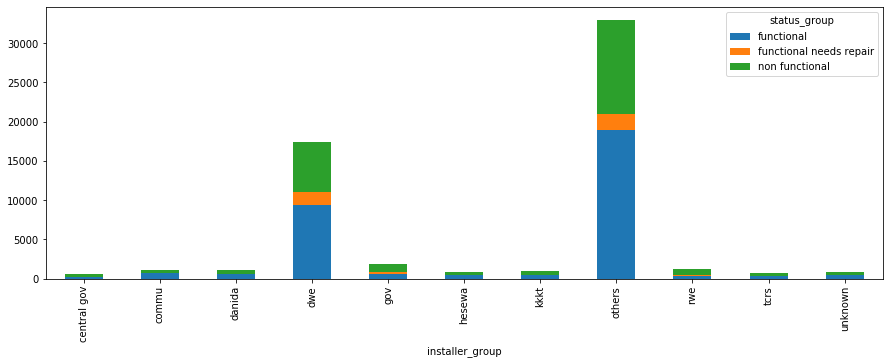

In [16]:
pd.crosstab(df.installer_group, df.status_group).plot.bar(stacked=True, figsize=(15,5));

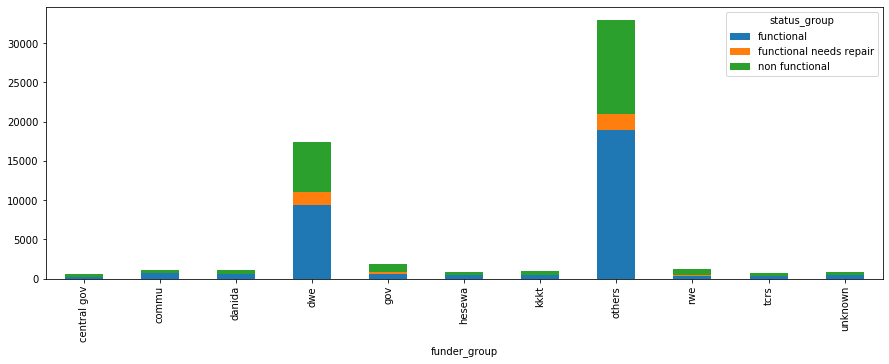

In [17]:
pd.crosstab(df.funder_group, df.status_group).plot.bar(stacked=True, figsize=(15,5));

# Water quality 

In [18]:
pd.crosstab(df.water_quality, df.status_group, margins=True)

status_group        functional  functional needs repair  non functional    All
water_quality                                                                 
coloured                   246                       54             190    490
fluoride                   151                       13              36    200
fluoride abandoned           6                        0              11     17
milky                      438                       14             352    804
salty                     2220                      225            2411   4856
salty abandoned            174                       72              93    339
soft                     28760                     3904           18154  50818
unknown                    264                       35            1577   1876
All                      32259                     4317           22824  59400

# Water quantity

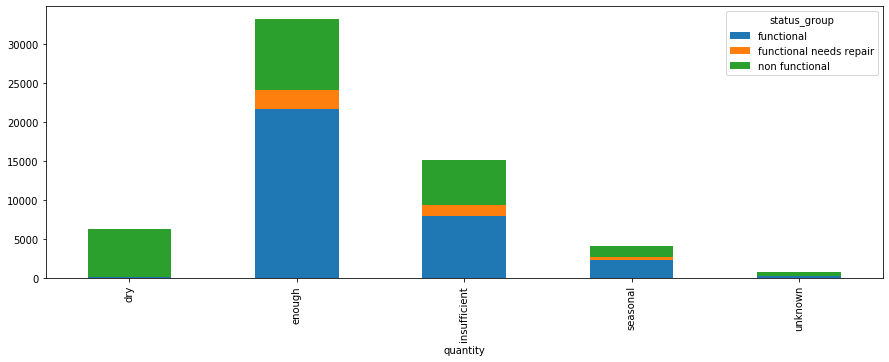

In [19]:
pd.crosstab(df.quantity, df.status_group).plot.bar(stacked=True, figsize=(15,5));

# Water source

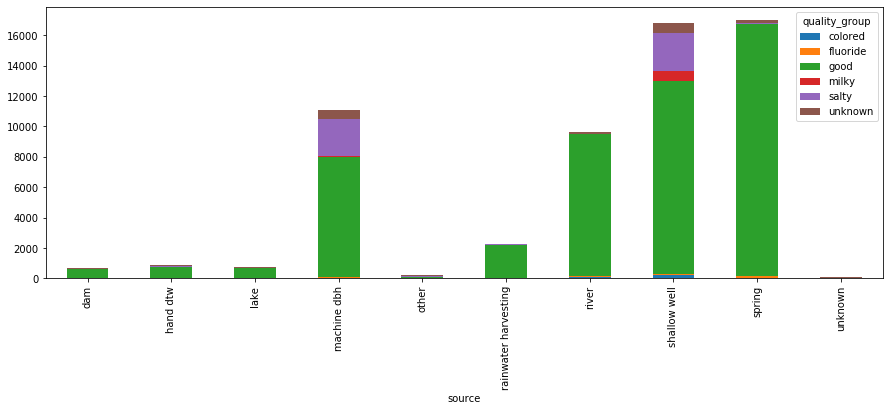

In [21]:
pd.crosstab(df.source, df.quality_group).plot.bar(stacked=True, figsize=(15,5));

# Water pump types

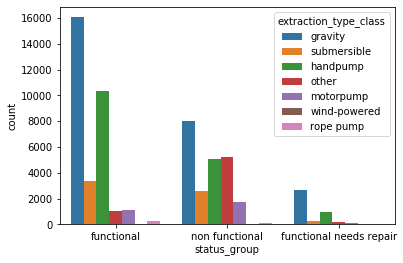

In [34]:
sns.countplot(x = "status_group", hue="extraction_type_class", data = df)

# Registed time and dates

In [20]:
tanzania_date_recorded = pd.to_datetime(df.date_recorded)
tanzania_date_recorded.describe()

count                   59400
unique                    356
top       2011-03-15 00:00:00
freq                      572
first     2002-10-14 00:00:00
last      2013-12-03 00:00:00
Name: date_recorded, dtype: object

# Zero values 

In [22]:
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [23]:
df_copy = df.copy()

In [24]:
df_copy.replace(0, np.nan, inplace= True)
df_copy.isnull().sum()

id                           1
amount_tsh               41639
date_recorded                0
funder                    3635
gps_height               20438
installer                 3655
longitude                 1812
latitude                     0
wpt_name                     0
num_private              58643
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code               23
lga                          0
ward                         0
population               21381
public_meeting            8389
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                   20548
construction_year        20709
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

# Missing not at random
* Population and contruction year
* GPS height and population
* installer and funder

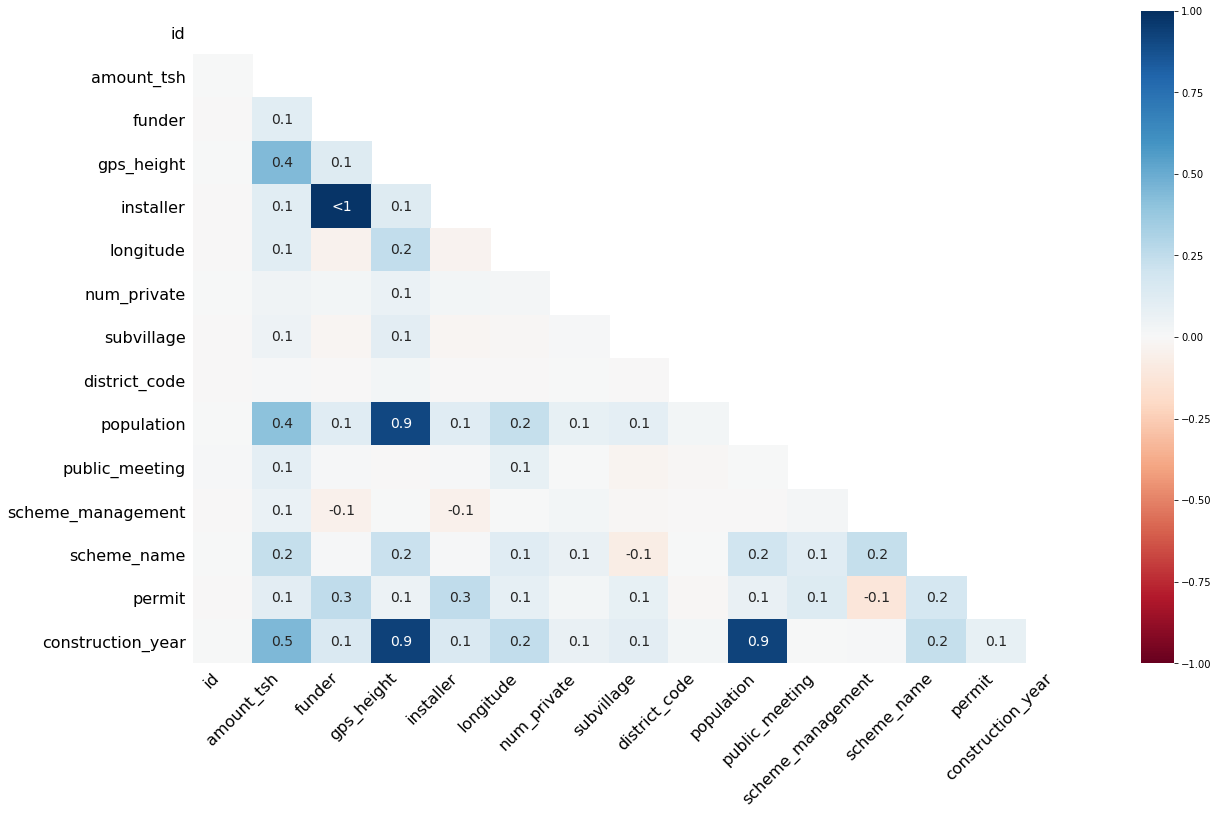

In [25]:
msno.heatmap(df_copy)

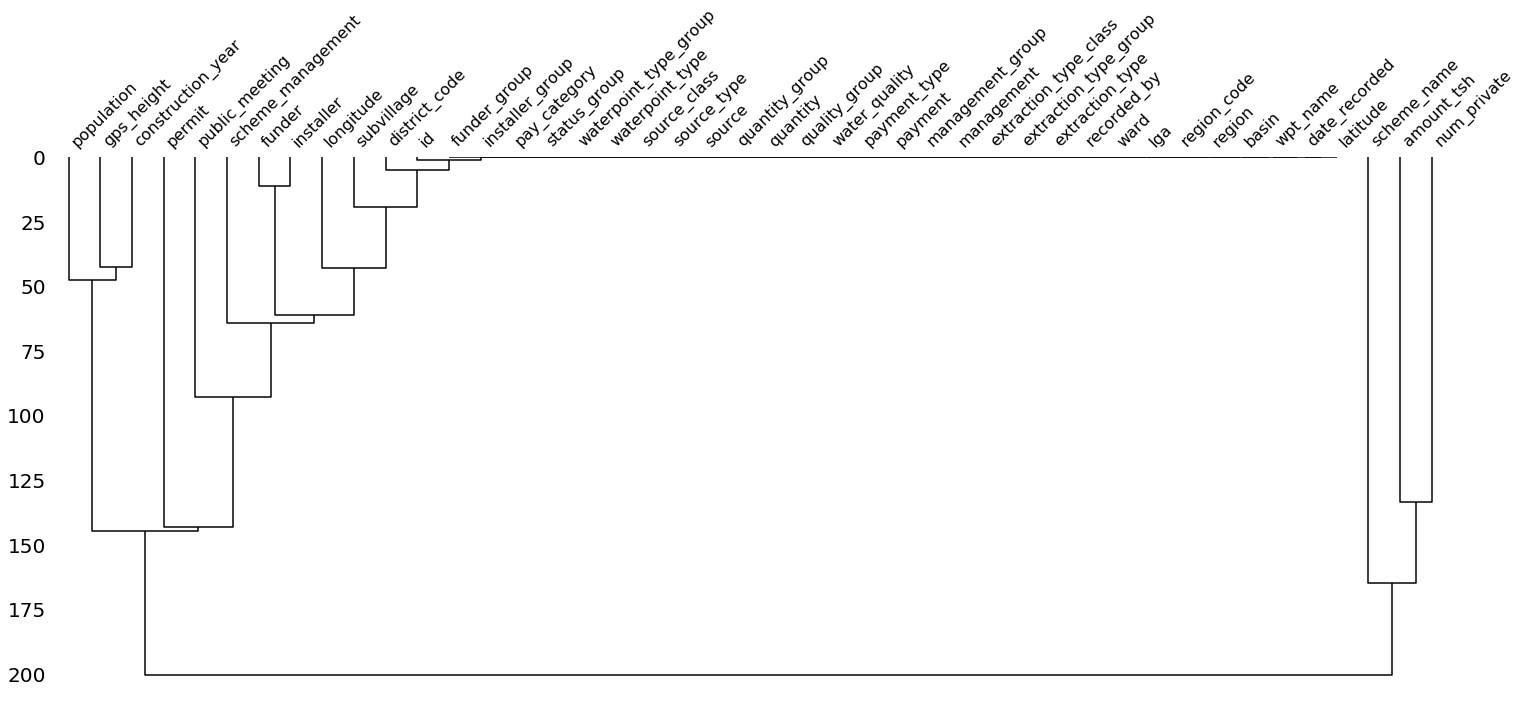

In [26]:
msno.dendrogram(df_copy)

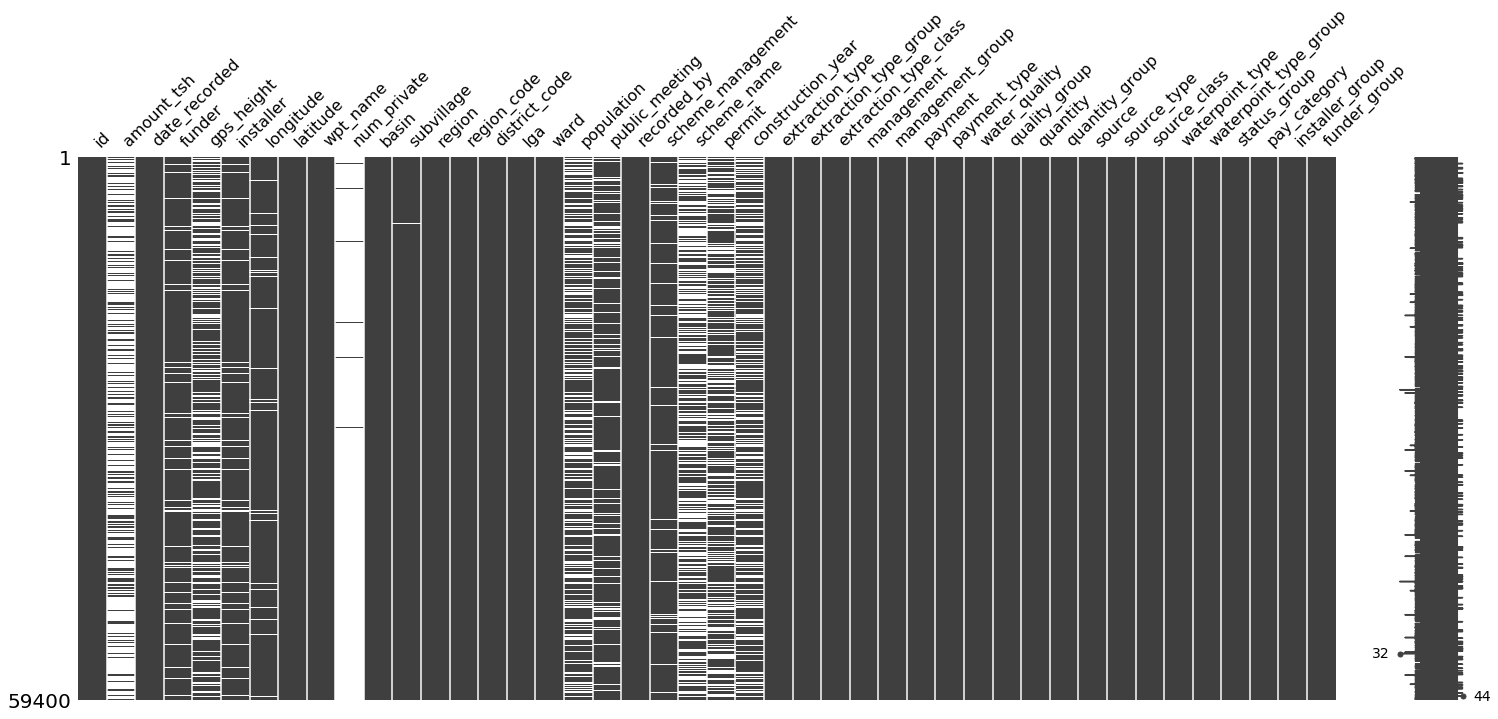

In [27]:
msno.matrix(df_copy)

# Popoulation Zero Region
* Pwani, Singida,Arusha (Zero)
* Kigoma, Rukwa (Nearly Zero)

In [28]:
# Grouping

def year_cl(df):
    if df["construction_year"]==0:
        return 'unknown'
    elif 1960 <= df["construction_year"]<=1969:
        return "60s"
    elif 1970 <= df["construction_year"]<=1979:
        return "70s"
    elif 1980 <= df["construction_year"]<=1989:
        return "80s"
    elif 1990 <= df["construction_year"]<=1999:
        return "90s"
    elif 2000 <= df["construction_year"]<=2009:
        return "00s"
    elif 2010 <= df["construction_year"]<=2019:
        return "10s"

df['construction_year_new'] = df.apply(lambda df: year_cl(df), axis=1)

In [29]:
# Population zero or not zero

def pop_cl(df):
    if df["population"]==0:
        return "1"
    else:
        return "0"
df["population_zero"] = df.apply(lambda df:pop_cl(df),axis =1)

In [30]:
n_f_pop=df.loc[(df["population"]==0)& (df["status_group"]==2)]
repair_pop=df.loc[(df["population"]==0)& (df["status_group"]==1)]

In [31]:
pop_zero =df.loc[(df["population"]==0)]
print("population zero percentage : ",len(pop_zero)/len(df))

population zero percentage :  0.35994949494949496


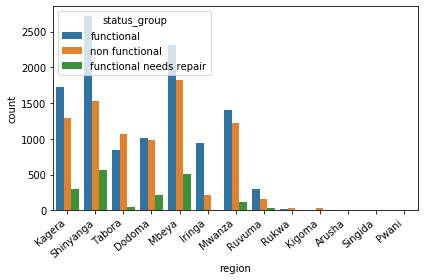

In [32]:
ax =sns.countplot(x = "region",hue="status_group",data=pop_zero)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

# Population zero and construction year correlation 
* if popularion is zero, construction year will be unknown 

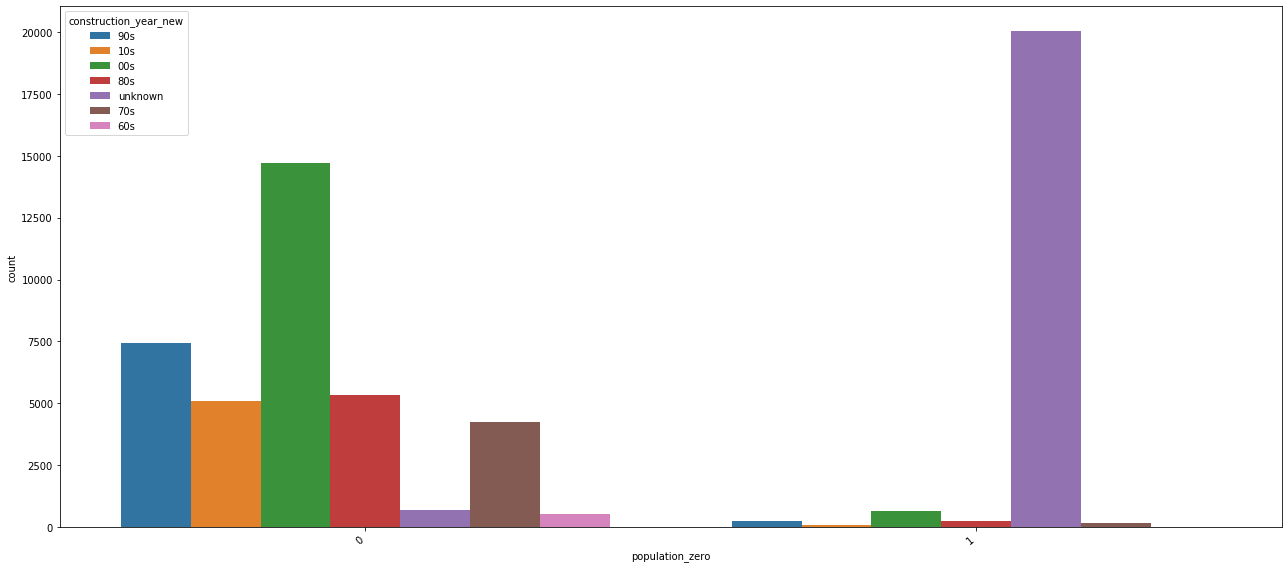

In [33]:
plt.figure(figsize=(18,8))
ax =sns.countplot(x = "population_zero",hue="construction_year_new",data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\yuka\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [50]:

df = pd.read_csv("data/tanzania_cleaned_df.csv")

# Find out preictor variables' correlation wihth status_group_functional_needs_repair

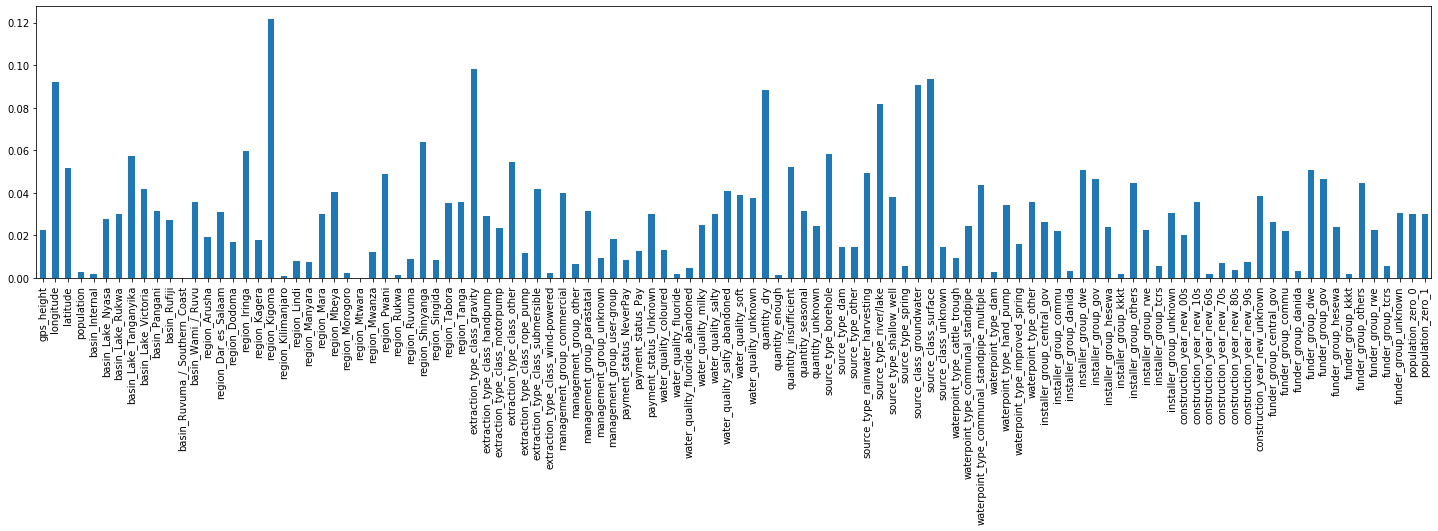

In [4]:
df_corr = df.drop(["status_group_non_functional", "status_group_functional_needs_repair","status_group_functional"], axis=1).corrwith(df.status_group_functional_needs_repair).agg('square')

f, ax = plt.subplots(figsize=(25,5))
df_corr.agg('sqrt').plot.bar(ax=ax)

# Find out preictor variables' correlation wiht status_group_functional

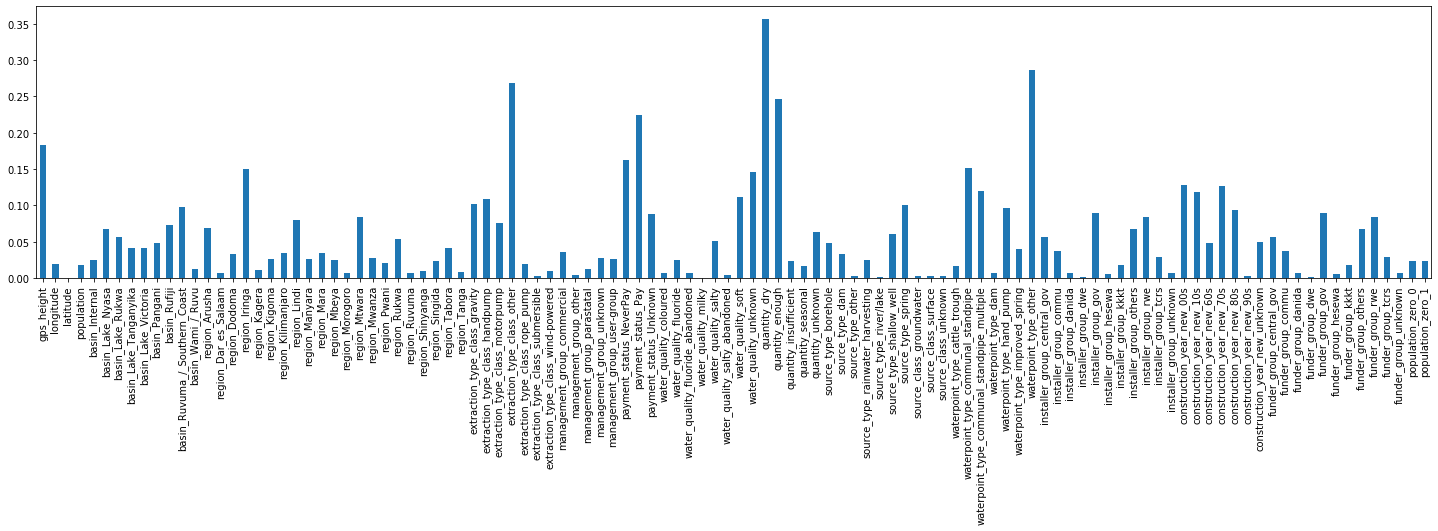

In [5]:
df_corr = df.drop(["status_group_non_functional", "status_group_functional_needs_repair","status_group_functional"], axis=1).corrwith(df.status_group_functional).agg('square')

f, ax = plt.subplots(figsize=(25,5))
df_corr.agg('sqrt').plot.bar(ax=ax)

# Find out preictor variables' correlation wiht status_group_non_functional

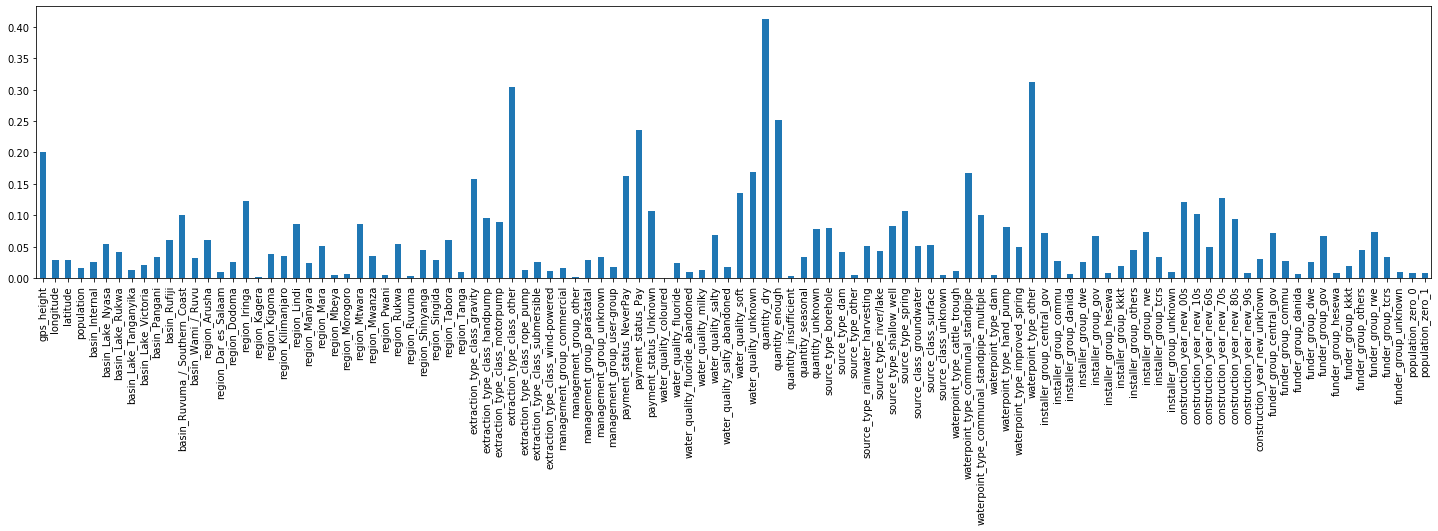

In [6]:
df_corr = df.drop(["status_group_non_functional", "status_group_functional_needs_repair","status_group_functional"], axis=1).corrwith(df.status_group_non_functional).agg('square')

f, ax = plt.subplots(figsize=(25,5))
df_corr.agg('sqrt').plot.bar(ax=ax)

# Resampling data balance bar chart

In [51]:
X = df.iloc[0:59400,0:110]
y= df[['status_group_functional','status_group_functional_needs_repair','status_group_non_functional']]

In [53]:
y = preprocessing.label_binarize(y, classes=[0, 1, 2])
y

C:\Users\yuka\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

C:\Users\yuka\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject



array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [57]:
def split_data_resampling(X,y, test_percentage=0.2):
    #import pdb;pdb.set_trace()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_percentage, random_state=42)
    smote_enn = SMOTEENN(random_state=0)
    X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)
    return X_train_resampled, y_train_resampled, X_test, y_test 

In [58]:
X_train_resampled, y_train_resampled, X_test, y_test  = split_data_resampling(X,y)

In [59]:
print(len(y_train_resampled))

58760


In [60]:
np.sum(y_train_resampled[:,0])

17242

In [65]:
np.sum(y_train_resampled[:,0])/len(y_train_resampled)

0.293430905377808

In [61]:
np.sum(y_train_resampled[:,1])

22137

In [66]:
np.sum(y_train_resampled[:,1])/len(y_train_resampled)

0.3767358747447243

In [62]:
np.sum(y_train_resampled[:,2])

19381

In [67]:
np.sum(y_train_resampled[:,2])/len(y_train_resampled)

0.32983321987746766

In [73]:
dfpx2 = [["functional",29.3,17242],["functional needs repair",37.6,22137],["non functional",32.9,19381]]


In [74]:
dfpx_chart2 = pd.DataFrame(dfpx2,columns=["Labels","Percentage","The number of observations"])
dfpx_chart2

Labels  Percentage  The number of observations
0               functional        29.3                       17242
1  functional needs repair        37.6                       22137
2           non functional        32.9                       19381

In [75]:
fig = px.bar(dfpx_chart2, y='The number of observations',x='Labels',text='Percentage',color="Labels")
fig.show()

In [9]:
y_train_upsampled = pd.read_csv("data/y_train_upsampled.csv")
y_train_upsampled

Unnamed: 0    status_group
0               0      functional
1               1      functional
2               2  non functional
3               3  non functional
4               4  non functional
...           ...             ...
61954       61954  non functional
61955       61955  non functional
61956       61956  non functional
61957       61957  non functional
61958       61958  non functional

[61959 rows x 2 columns]

In [12]:
y_train_upsampled.status_group.value_counts()

functional needs repair    20653
non functional             20653
functional                 20653
Name: status_group, dtype: int64

In [11]:
y_train_upsampled.status_group.value_counts()/len(y_train_upsampled)

functional needs repair    0.333333
non functional             0.333333
functional                 0.333333
Name: status_group, dtype: float64

In [14]:
dfpx3 =[["functional",33.3,20653],["functional needs repair",33.3,20653],["non functional",33.3,20653]]

In [15]:
dfpx_chart3 = pd.DataFrame(dfpx3,columns=["Labels","Percentage","The number of observations"])
dfpx_chart3

Labels  Percentage  The number of observations
0               functional        33.3                       20653
1  functional needs repair        33.3                       20653
2           non functional        33.3                       20653

In [17]:
fig = px.bar(dfpx_chart3, y='The number of observations',x='Labels',text='Percentage',color="Labels")
fig.show()